In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import signal



from scipy import signal
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split

import pickle 

from sklearn.neighbors import KNeighborsRegressor

participants_dps_csv_data = pd.read_csv("/Users/cslinxs/Desktop/all_weeks/pwdb_model_configs.csv")

print(participants_dps_csv_data.get(" dbp [mmHg]")[4])

78.067


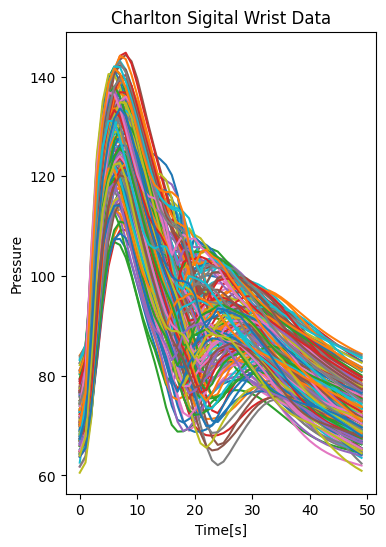

162


In [111]:
charlton_point_dbp = [[],[]]

# will track age,dbp values
charlton_set_seen_duplicates =set()

Charlton_dataset_csv = "/Users/cslinxs/Desktop/all_weeks/Charlton_dataset_csv"
for files in os.listdir(Charlton_dataset_csv):
    if "_P.Csv" in files.title() and "Digital" in files.title():
        body_part = files.title().split("_")[1]
        function = files.title().split("_")[2]
        participants_csv_data = pd.read_csv(Charlton_dataset_csv+"/"+files)
        
        plt.figure(figsize=(4, 6)) 
        for i in range(len(participants_csv_data)): #len(participants_csv_data)
            resampled_y = signal.resample(participants_csv_data.iloc[i][1:].dropna(), 50)
            if True in list(np.isnan(resampled_y)):
                print("??",i)
                # There is a false
                
            else:
                indivuals_set = (participants_dps_csv_data.get(" age [years]")[i],participants_dps_csv_data.get(" dbp [mmHg]")[i],participants_dps_csv_data.get(" pvr [Pa s/m^3]")[i])
                if not(indivuals_set in charlton_set_seen_duplicates):
                    charlton_point_dbp[0].append(resampled_y)
                    charlton_point_dbp[1].append(participants_dps_csv_data.get(" dbp [mmHg]")[i])
                    plt.plot(resampled_y)
                    charlton_set_seen_duplicates.add(indivuals_set)
        plt.title(f"Charlton Sigital Wrist Data")
        
        
        plt.xlabel("Time[s]")
        plt.ylabel("Pressure")
        plt.show()
print(len(charlton_set_seen_duplicates))


In [119]:

participants_dps_csv_data = pd.read_csv("/Users/cslinxs/Desktop/all_weeks/pwdb_model_configs.csv")

print(len(set(participants_dps_csv_data.get(" dbp [mmHg]"))))
print(len(set(participants_dps_csv_data.get(" sv [ml]"))))

print(len(set(participants_dps_csv_data.get(" pvr [Pa s/m^3]"))))

for column in participants_dps_csv_data:
    print(column, len(set(participants_dps_csv_data[column])))

6
18
162
Subject Number 4374
 base 2
 base_age 2
 age [years] 6
 hr [bpm] 18
 sv [ml] 18
 pft [ms] 1
 rfv [ml] 1
 dbp [mmHg] 6
 mbp [mmHg] 18
 viscosity [Pa s] 1
 alpha [-] 1
 p_drop [mmHg] 1
 pvc [scaling factor] 6
 p_out [mmHg] 1
 density [kg /m^3] 1
 lvet [ms] 156
 pvr [Pa s/m^3] 162
 b0 [g/s] 1
 b1 [g cm/s] 1
 k1 [g/s^2/cm] 1
 k2 [/cm] 1
 k3 [g/s^2/cm] 162


In [114]:
print(len(all_points))

162


162


Text(79.455, 71.75425014351495, 'r2 -0.33')

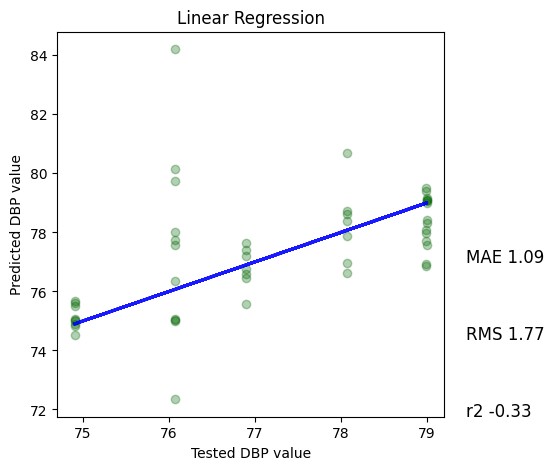

In [113]:
# single ones
plt.figure(figsize=(5, 5)) 
n_neighbors=1
#neigh = KNeighborsRegressor(n_neighbors=n_neighbors)
neigh = LinearRegression()


all_points = np.array(charlton_point_dbp[0])
all_points = all_points.reshape(all_points.shape[0], -1)
print(len(all_points))
X_train, X_test, Y_train, Y_test = train_test_split(all_points, np.array(charlton_point_dbp[1]), test_size=0.3)


X_test = X_test.reshape(X_test.shape[0], -1)

 
the_fit= neigh.fit(X_train, Y_train)

y_predict= neigh.predict(X_test)


plt.rcParams.update({'font.size': 10})

plt.scatter(Y_test, y_predict,  color="darkgreen",  alpha=0.3 )
plt.plot(Y_test, Y_test, color="blue", linewidth=2, alpha=0.9)

plt.title(f"KNN")
plt.title(f"Linear Regression")



plt.xlabel("Tested DBP value")
plt.ylabel("Predicted DBP value")

xmin, xmax, ymin, ymax = plt.axis()
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.4,s=f"MAE {round(mean_absolute_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin+(ymax-ymin)*0.2, s= f"RMS {round(root_mean_squared_error(Y_test, y_predict),2)}", fontsize=12)
plt.text(xmax+0.25, ymin, s= f"r2 {round(r2_score(Y_test, y_predict),2)}", fontsize=12)
